In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go


plt.style.use('ggplot')

# Set the display options to show all columns
pd.set_option('display.max_columns', None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



In [11]:
stats = pd.read_excel('/kaggle/input/messi-vs-ronaldo-dataset/Messi vs Ronaldo Stat.xlsx', sheet_name='Factors Stat' )
stats.columns = stats.columns.str.strip()
stats 

,Factors,Messi,Ronaldo
0,All time Career Goals,803.00,832.00
1,Goal per Game,0.79,0.72
2,Assists,354.00,236.00
3,Games,1018.00,1157.00
4,Hat-tricks,57.00,62.00
5,Penalties,108.00,150.00
6,Free Kick Goals,62.00,60.00
7,Header,26.00,141.00
8,Shots,2891.00,3488.00
9,Shots on Target,1370.00,1436.00


## Let's visualize that data

### Goals and goals contribution

In [38]:
# Define a custom color palette
my_palette = {"Messi": "#7D3C98", "Ronaldo": "#3498DB"}

# Visalize goals, non-penalty goals, and goals contribution
goals = stats.iloc[[0,15,2,16], :]
goals = pd.melt(goals, id_vars='Factors', value_vars=['Messi', 'Ronaldo'], var_name='Player')
goals


,Factors,Player,value
0,All time Career Goals,Messi,803.0
1,Non-penalty Goals,Messi,695.0
2,Assists,Messi,354.0
3,Goals Contribution (G+A),Messi,1157.0
4,All time Career Goals,Ronaldo,832.0
5,Non-penalty Goals,Ronaldo,682.0
6,Assists,Ronaldo,236.0
7,Goals Contribution (G+A),Ronaldo,1068.0


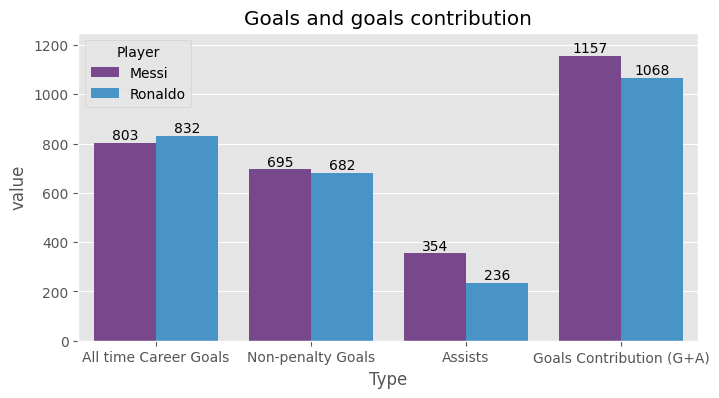

In [48]:
#Visualize goal types
plt.figure(figsize=[8,4])
ax = sns.barplot(goals, y='value', x='Factors', hue='Player', palette=my_palette)


# add labels to the bars
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label=goals['value'][i])

plt.title('Goals and goals contribution')
plt.xlabel('Type')
plt.ylim(0, 1250)
plt.show()

In [14]:
#Prepare data to check goal types

gt = stats.iloc[[4,5,6,7], :]
gt = pd.melt(gt, id_vars=['Factors'], value_vars=['Messi', 'Ronaldo'], var_name='Player')
gt

,Factors,Player,value
0,Hat-tricks,Messi,57.0
1,Penalties,Messi,108.0
2,Free Kick Goals,Messi,62.0
3,Header,Messi,26.0
4,Hat-tricks,Ronaldo,62.0
5,Penalties,Ronaldo,150.0
6,Free Kick Goals,Ronaldo,60.0
7,Header,Ronaldo,141.0


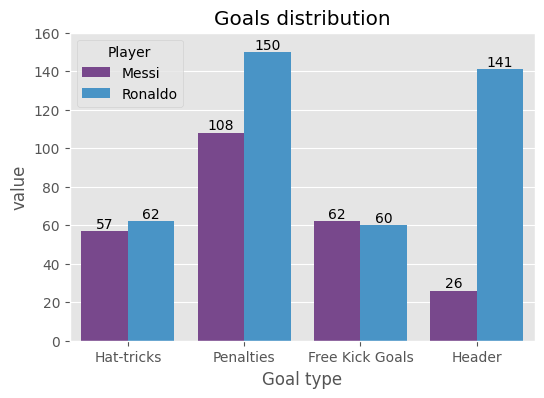

In [47]:
# Visualize goal types 

plt.figure(figsize=[6,4])

ax = sns.barplot(gt, y='value', x='Factors', hue='Player', palette=my_palette)

# add labels to the bars
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label=gt['value'][i])

plt.title('Goals distribution')
plt.xlabel('Goal type')
plt.ylim(0, 160)

plt.show()

As we can see, Cristiano strongly surpasses Messi in the number of goals scored with his head. However, this should not come as a surprise to all soccer fans because these players are separated by almost 20 cm difference in height. In addition, cristiano has a great reach jump

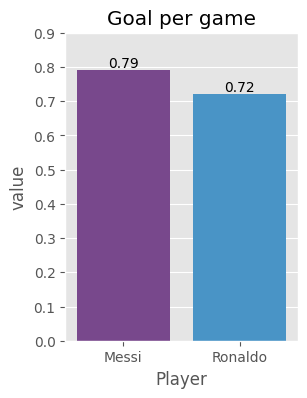

In [46]:
gpg = stats[stats['Factors'] == 'Goal per Game']
gpg = pd.melt(gpg, id_vars='Factors', value_vars=['Messi', 'Ronaldo'], var_name='Player')


plt.figure(figsize=[3,4])
ax = sns.barplot(data=gpg, x='Player', y='value', palette=my_palette) 

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label = gpg['value'][i])

plt.title('Goal per game')
plt.xlabel('Player')
plt.ylim(0, 0.9)

plt.show()


### Shots

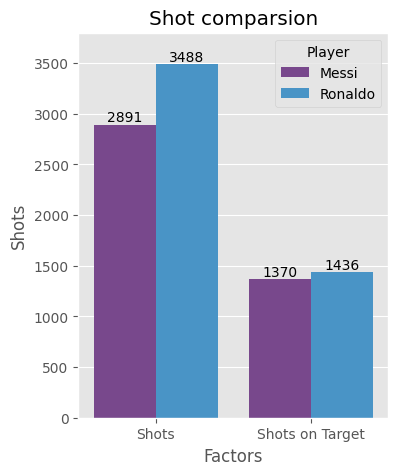

In [45]:
shots = stats.iloc[[8,9], :]
shots = pd.melt(shots, id_vars='Factors', value_vars=['Messi', 'Ronaldo'], var_name='Player')

plt.figure(figsize=[4,5])

ax = sns.barplot(shots, y='value', x='Factors', hue='Player', palette=my_palette)
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label=shots['value'][i])

plt.title('Shot comparsion')
plt.ylabel('Shots')
plt.ylim(0, 3800)
plt.show()

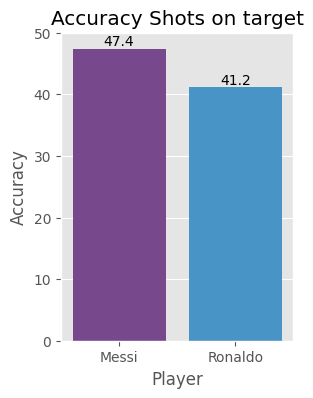

In [44]:
ast = stats[stats['Factors'] == 'Accuracy Shots on target']
ast = pd.melt(ast, id_vars='Factors', value_vars=['Messi', 'Ronaldo'], var_name='Player')

plt.figure(figsize=[3,4])

ax = sns.barplot(ast, y='value', x='Player', palette=my_palette)
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label=ast['value'][i])

plt.title('Accuracy Shots on target')
plt.ylabel('Accuracy')
plt.ylim(0, 50)
plt.show()

As we can see, Messi is more effective when it comes to shots on goal.

### Playmaking stats

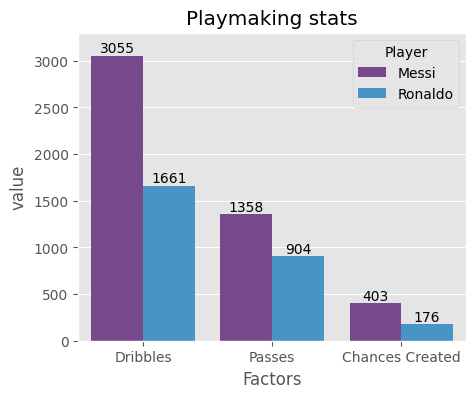

In [43]:
playmaking = stats.iloc[[11,12,13], :]
playmaking = pd.melt(playmaking, id_vars='Factors', value_vars=['Messi', 'Ronaldo'], var_name='Player')

plt.figure(figsize=[5,4])

ax = sns.barplot(playmaking, y='value', x='Factors', hue='Player', palette=my_palette)
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label=playmaking['value'][i])

plt.title('Playmaking stats')

plt.ylim(0, 3300)
plt.show()

As we can see, Messi is definitely a better playmaker than Cristiano.

### Awards

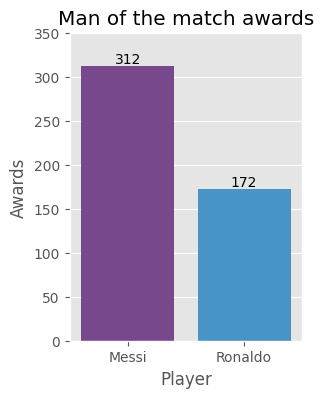

In [42]:
moftm = stats[stats['Factors'] == 'Man of the Match']
moftm = pd.melt(moftm, id_vars='Factors', value_vars=['Messi', 'Ronaldo'], var_name='Player')

plt.figure(figsize=[3,4])

ax = sns.barplot(moftm, y='value', x='Player', palette=my_palette)
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label=moftm['value'][i])

plt.title('Man of the match awards')
plt.ylabel('Awards')
plt.ylim(0, 350)
plt.show()

As we can see, Messi was more often the player who changed the match on his own.

In [40]:
awards = pd.read_excel('/kaggle/input/messi-vs-ronaldo-dataset/Messi vs Ronaldo Stat.xlsx', sheet_name='Awards' )
awards = awards.iloc[[0,1,2], :]
awards.columns = awards.columns.str.strip()

/tmp/ipykernel_34/1283607224.py:12: UserWarning:

Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



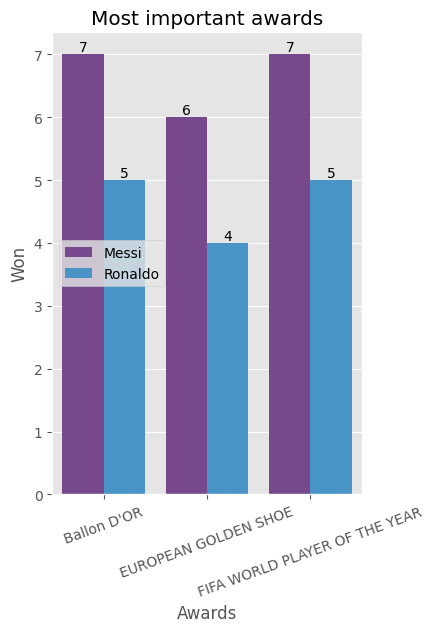

In [41]:
awards = pd.melt(awards, id_vars='Awards', value_vars=['Messi', 'Ronaldo'], var_name='Player')

plt.figure(figsize=[4,6])

ax = sns.barplot(awards, y='value', x='Awards', hue='Player', palette=my_palette)
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label=awards['value'][i])

plt.title('Most important awards')
plt.ylabel('Won')
plt.xticks(rotation=20)
plt.legend(loc='center left')
#plt.ylim(0, 350)
plt.show()

### Season stats

In [3]:
df = pd.read_excel('/kaggle/input/messi-vs-ronaldo-dataset/Messi vs Ronaldo Stat.xlsx', sheet_name='All Compitition Exclude Country')
df = df.sort_index(axis=0, ascending=False)
df.head()

,Messi Games,Messi Goals,Messi Assists,Year,Ronaldo Assists,Ronaldo Goals,Ronaldo Games
20,0,0,0,2002/2003,4,5,31
19,0,0,0,2003/2004,6,6,40
18,9,1,0,2004/2005,8,9,50
17,25,8,3,2005/2006,8,12,47
16,36,17,3,2006/2007,14,23,53


In [34]:
ronaldo_cols = ['Ronaldo Games']
messi_cols = ['Messi Games']


fig = go.Figure()


# series and data for Ronaldo
for i, col in enumerate(ronaldo_cols):
    fig.add_trace(
        go.Scatter(x=df['Year'], y=df[col], mode='lines+markers', name=col,
                   line=dict(color='#3498DB')))
    
# series and data for Messi
for i, col in enumerate(messi_cols):
    fig.add_trace(
        go.Scatter(x=df['Year'], y=df[col], mode='lines+markers', name=col,
                   line=dict(color='#7D3C98')))


fig.update_layout(title='Games played by season', xaxis_title='Season',
                  yaxis_title='Games', legend=dict(x=0.1, y=1.1))

fig.show()


In [49]:
ronaldo_cols = ['Ronaldo Goals']
messi_cols = ['Messi Goals']


fig = go.Figure()


# series and data for Ronaldo
for i, col in enumerate(ronaldo_cols):
    fig.add_trace(
        go.Scatter(x=df['Year'], y=df[col], mode='lines+markers', name=col,
                   line=dict(color='#3498DB')))
    
# series and data for Messi
for i, col in enumerate(messi_cols):
    fig.add_trace(
        go.Scatter(x=df['Year'], y=df[col], mode='lines+markers', name=col,
                   line=dict(color='#7D3C98')))


fig.update_layout(title='Season goals', xaxis_title='Season',
                  yaxis_title='Goals', legend=dict(x=0.1, y=1.1))

fig.show()

In [50]:
ronaldo_cols = ['Ronaldo Assists']
messi_cols = ['Messi Assists']


fig = go.Figure()


# series and data for Ronaldo
for i, col in enumerate(ronaldo_cols):
    fig.add_trace(
        go.Scatter(x=df['Year'], y=df[col], mode='lines+markers', name=col,
                   line=dict(color='#3498DB')))
    
# series and data for Messi
for i, col in enumerate(messi_cols):
    fig.add_trace(
        go.Scatter(x=df['Year'], y=df[col], mode='lines+markers', name=col,
                   line=dict(color='#7D3C98')))


fig.update_layout(title='Season assists', xaxis_title='Season',
                  yaxis_title='Assists', legend=dict(x=0.1, y=1.1))

fig.show()

### Conclusion

Messi and Ronaldo are two of the greatest footballers of all time, and their statistics reflect their incredible skill and talent on the field. While Ronaldo has scored more goals overall, Messi has a higher ratio of goals to games played and more assists. Additionally, Messi has won more Ballon d'Or awards, which are given to the best player in the world.

However, it's important to note that football is a team sport, and statistics only tell part of the story. Both players have achieved remarkable success and have helped their teams win numerous trophies. Ultimately, it's difficult to compare the two players directly, as they have different playing styles and strengths. They are both legends of the game and have left an indelible mark on football history.